In [1]:
import uproot

In [2]:
file = uproot.open("/home/sahil/Documents/20131004_M1_05029747.003_Y_MagicCrab-W0.40+035.root")

In [3]:
file.keys()

[b'Events;1']

In [4]:
events = uproot.open("/home/sahil/Documents/20131004_M1_05029747.003_Y_MagicCrab-W0.40+035.root")["Events"]
events.keys()

[b'MPointingPos.',
 b'MRawEvtHeader.',
 b'MTime.',
 b'MCerPhotEvt.',
 b'MTriggerPattern.',
 b'MArrivalTime.']

In [5]:
events.show()

MPointingPos.              TStreamerInfo              None
MPointingPos.MParContainer (no streamer)              None
MPointingPos.MParContainer.TObject
                           (no streamer)              None
MPointingPos.MParContainer.fUniqueID
                           TStreamerBasicType         asdtype('>u4')
MPointingPos.MParContainer.fBits
                           TStreamerBasicType         asdtype('>u4')

MPointingPos.fZd           TStreamerBasicType         asdtype('>f8')
MPointingPos.fAz           TStreamerBasicType         asdtype('>f8')
MPointingPos.fDevZd        TStreamerBasicType         asdtype('>f8')
MPointingPos.fDevAz        TStreamerBasicType         asdtype('>f8')
MPointingPos.fRa           TStreamerBasicType         asdtype('>f8')
MPointingPos.fHa           TStreamerBasicType         asdtype('>f8')
MPointingPos.fDec          TStreamerBasicType         asdtype('>f8')
MPointingPos.fDevHa        TStreamerBasicType         asdtype('>f8')
MPointingPos.fDevDec       

In [8]:
a = events.array("MCerPhotEvt.fPixels.fPhot")
a = numpy.asarray(a)
x = a[10][0:1039]
x = x[:,None]
x.shape

(1039, 1)

In [7]:
from dl1_data_handler.image_mapper import ImageMapper
import numpy

In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

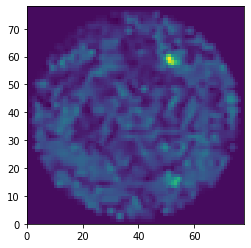

In [15]:
test_pixel_values = x
cam = "MAGICCam"
mapping_method = {cam: 'bilinear_interpolation'}
default_mapper = ImageMapper(mapping_method = mapping_method)
image = default_mapper.map_image(pixels=test_pixel_values, camera_type = cam)
plot_image(image)

In [25]:
import ctapipe
from ctapipe.io.eventsource import EventSource

In [26]:
with EventSource("/home/sahil/Documents/20131004_M1_05029747.003_Y_MagicCrab-W0.40+035.root") as source:
    for event in source:
        event

TypeError: Can't instantiate abstract class EventSource with abstract methods _generator, is_compatible